# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [4]:
import helper
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100.0%
100.0%
100.0%
100.0%


Here we can see one of the images.

<Axes: >

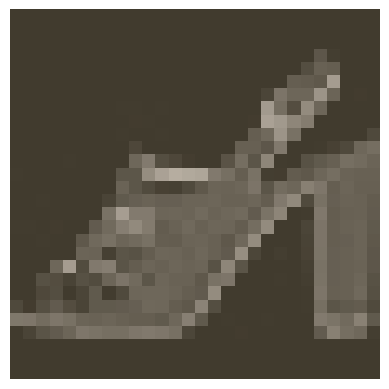

In [5]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [6]:
from torch import nn, optim
import torch.nn.functional as F

# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # Input layer: 784 pixels -> 256 hidden units
        self.fc1 = nn.Linear(784, 256)
        # Hidden layer: 256 -> 128 hidden units
        self.fc2 = nn.Linear(256, 128)
        # Hidden layer: 128 -> 64 hidden units
        self.fc3 = nn.Linear(128, 64)
        # Output layer: 64 -> 10 classes (clothing items)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.shape[0], -1)
        
        # Apply ReLU activation to hidden layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # Output layer with LogSoftmax
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

# Instantiate the model
model = Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

# 1. Create the network
model = Classifier()

# 2. Define the criterion and optimizer
# Since we return LogSoftmax in our Classifier, we use NLLLoss
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [8]:
# TODO: Train the network here
# 3. Train the network
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass (flattening happens inside our Classifier's forward method)
        log_ps = model(images)
        
        # Calculate loss
        loss = criterion(log_ps, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1} Training loss: {running_loss/len(trainloader):.4f}")

Epoch 1 Training loss: 0.5139
Epoch 2 Training loss: 0.3991
Epoch 3 Training loss: 0.3559
Epoch 4 Training loss: 0.3368
Epoch 5 Training loss: 0.3174


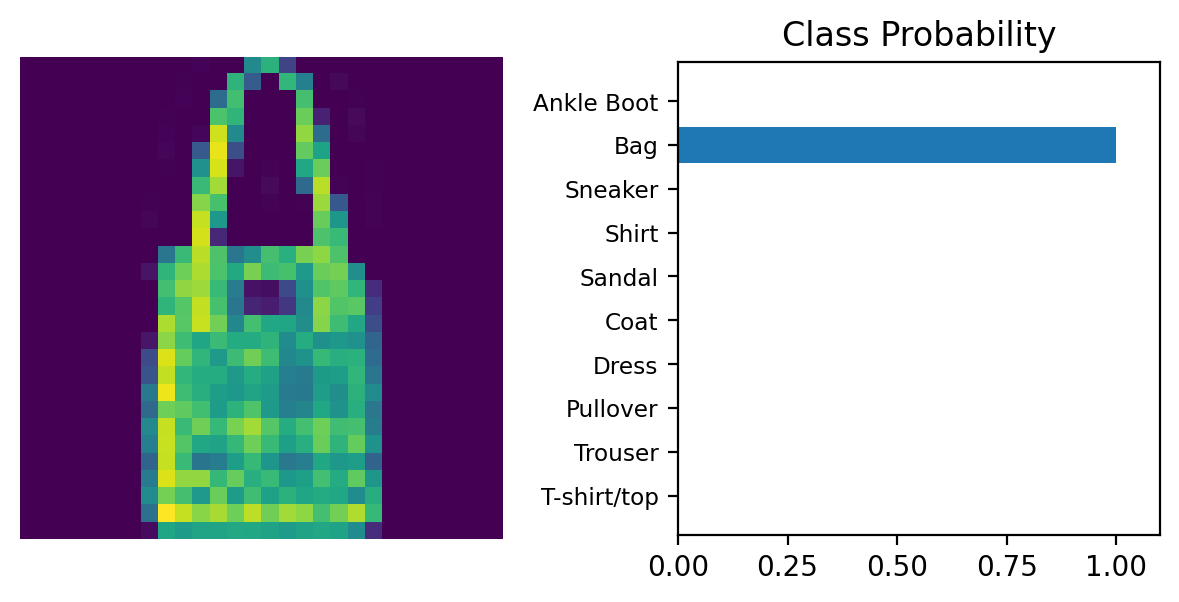

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the calass probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")